## Import packages

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy, time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

from sklearn import preprocessing


## 讀取資料

In [2]:
data_path = 'ml100/'
df_train = pd.read_csv(data_path + 'train_data.csv')
df_test = pd.read_csv(data_path + 'test_features.csv')

train_Y = df_train['poi']
names = df_test['name']
# df_train = df_train.drop(['name', 'poi'] , axis=1)
df_train = df_train.drop(['poi'] , axis=1)
# df_test = df_test.drop(['name'] , axis=1)
df = pd.concat([df_train,df_test])
df.head(10)

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
5,HIRKO JOSEPH,NaN,10259.0,NaN,NaN,joe.hirko@enron.com,30766064.0,77978.0,NaN,NaN,...,NaN,NaN,2856.0,NaN,NaN,NaN,NaN,NaN,91093.0,30766064.0
6,YEAGER F SCOTT,NaN,NaN,NaN,NaN,scott.yeager@enron.com,8308552.0,53947.0,NaN,NaN,...,NaN,NaN,147950.0,3576206.0,NaN,158403.0,NaN,NaN,360300.0,11884758.0
7,COLWELL WESLEY,1200000.0,27610.0,-144062.0,NaN,wes.colwell@enron.com,NaN,16514.0,40.0,240.0,...,NaN,NaN,101740.0,698242.0,NaN,288542.0,1132.0,1758.0,1490344.0,698242.0
8,LAY KENNETH L,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,...,81525000.0,3600000.0,10359729.0,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0
9,GLISAN JR BEN F,600000.0,NaN,NaN,NaN,ben.glisan@enron.com,384728.0,125978.0,16.0,52.0,...,NaN,71023.0,200308.0,393818.0,NaN,274975.0,874.0,873.0,1272284.0,778546.0


In [3]:
df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,8.200000e+01,3.900000e+01,4.900000e+01,1.700000e+01,1.020000e+02,9.500000e+01,86.000000,86.000000,86.000000,4.000000e+00,6.600000e+01,9.300000e+01,1.100000e+02,1.800000e+01,9.500000e+01,86.000000,86.000000,1.250000e+02,1.260000e+02
mean,2.374235e+06,1.642674e+06,-1.140475e+06,1.668049e+05,5.987054e+06,1.087289e+05,608.790698,64.895349,41.232558,4.196250e+07,1.470361e+06,9.190650e+05,2.321741e+06,1.664106e+05,5.621943e+05,1176.465116,2073.860465,5.081526e+06,6.773957e+06
std,1.071333e+07,5.161930e+06,4.025406e+06,3.198914e+05,3.106201e+07,5.335348e+05,1841.033949,86.979244,100.073111,4.708321e+07,5.942759e+06,4.589253e+06,1.251828e+07,4.201494e+06,2.716369e+06,1178.317641,2582.700981,2.906172e+07,3.895777e+07
min,7.000000e+04,-1.025000e+05,-2.799289e+07,3.285000e+03,3.285000e+03,1.480000e+02,12.000000,0.000000,0.000000,4.000000e+05,6.922300e+04,2.000000e+00,-2.604490e+06,-7.576788e+06,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.312500e+05,8.157300e+04,-6.948620e+05,9.878400e+04,5.278862e+05,2.261400e+04,22.750000,10.000000,1.000000,1.600000e+06,2.812500e+05,1.215000e+03,2.540180e+05,-3.896218e+05,2.118160e+05,249.750000,541.250000,3.944750e+05,4.945102e+05
50%,7.693750e+05,2.274490e+05,-1.597920e+05,1.085790e+05,1.310814e+06,4.695000e+04,41.000000,35.000000,8.000000,4.176250e+07,4.420350e+05,5.238200e+04,4.517400e+05,-1.469750e+05,2.599960e+05,740.500000,1211.000000,1.101393e+06,1.102872e+06
75%,1.200000e+06,1.002672e+06,-3.834600e+04,1.137840e+05,2.547724e+06,7.995250e+04,145.500000,72.250000,24.750000,8.212500e+07,9.386720e+05,3.620960e+05,1.002370e+06,-7.500975e+04,3.121170e+05,1888.250000,2634.750000,2.093263e+06,2.949847e+06
max,9.734362e+07,3.208340e+07,-8.330000e+02,1.398517e+06,3.117640e+08,5.235198e+06,14368.000000,528.000000,609.000000,8.392500e+07,4.852193e+07,4.266759e+07,1.303223e+08,1.545629e+07,2.670423e+07,5521.000000,15149.000000,3.098866e+08,4.345095e+08


In [4]:
len(df)

146

### 資料整理

In [5]:
# 檢查 DataFrame 空缺值的狀態
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data.head(10))
na_check(df)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
from_messages,41.095890
from_poi_to_this_person,41.095890
from_this_person_to_poi,41.095890


In [6]:
column = []
for col in df.columns:
    column.append(col)
column

['name',
 'bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'email_address',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

In [7]:
# a = df['from_poi_to_this_person'].map(lambda i: np.log(i) if i > 0 else 0)
# a = a.dropna().to_list()
# a
# # plt.hist(a, bins = len(a), range = (df['loan_advances'].min(), df['loan_advances'].max()))

# # # df["Fare"] = df["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
# plt.hist(a)
# # # # # plt.hist(a)
# # # # # df['loan_advances'].min()

#### 看資料分布

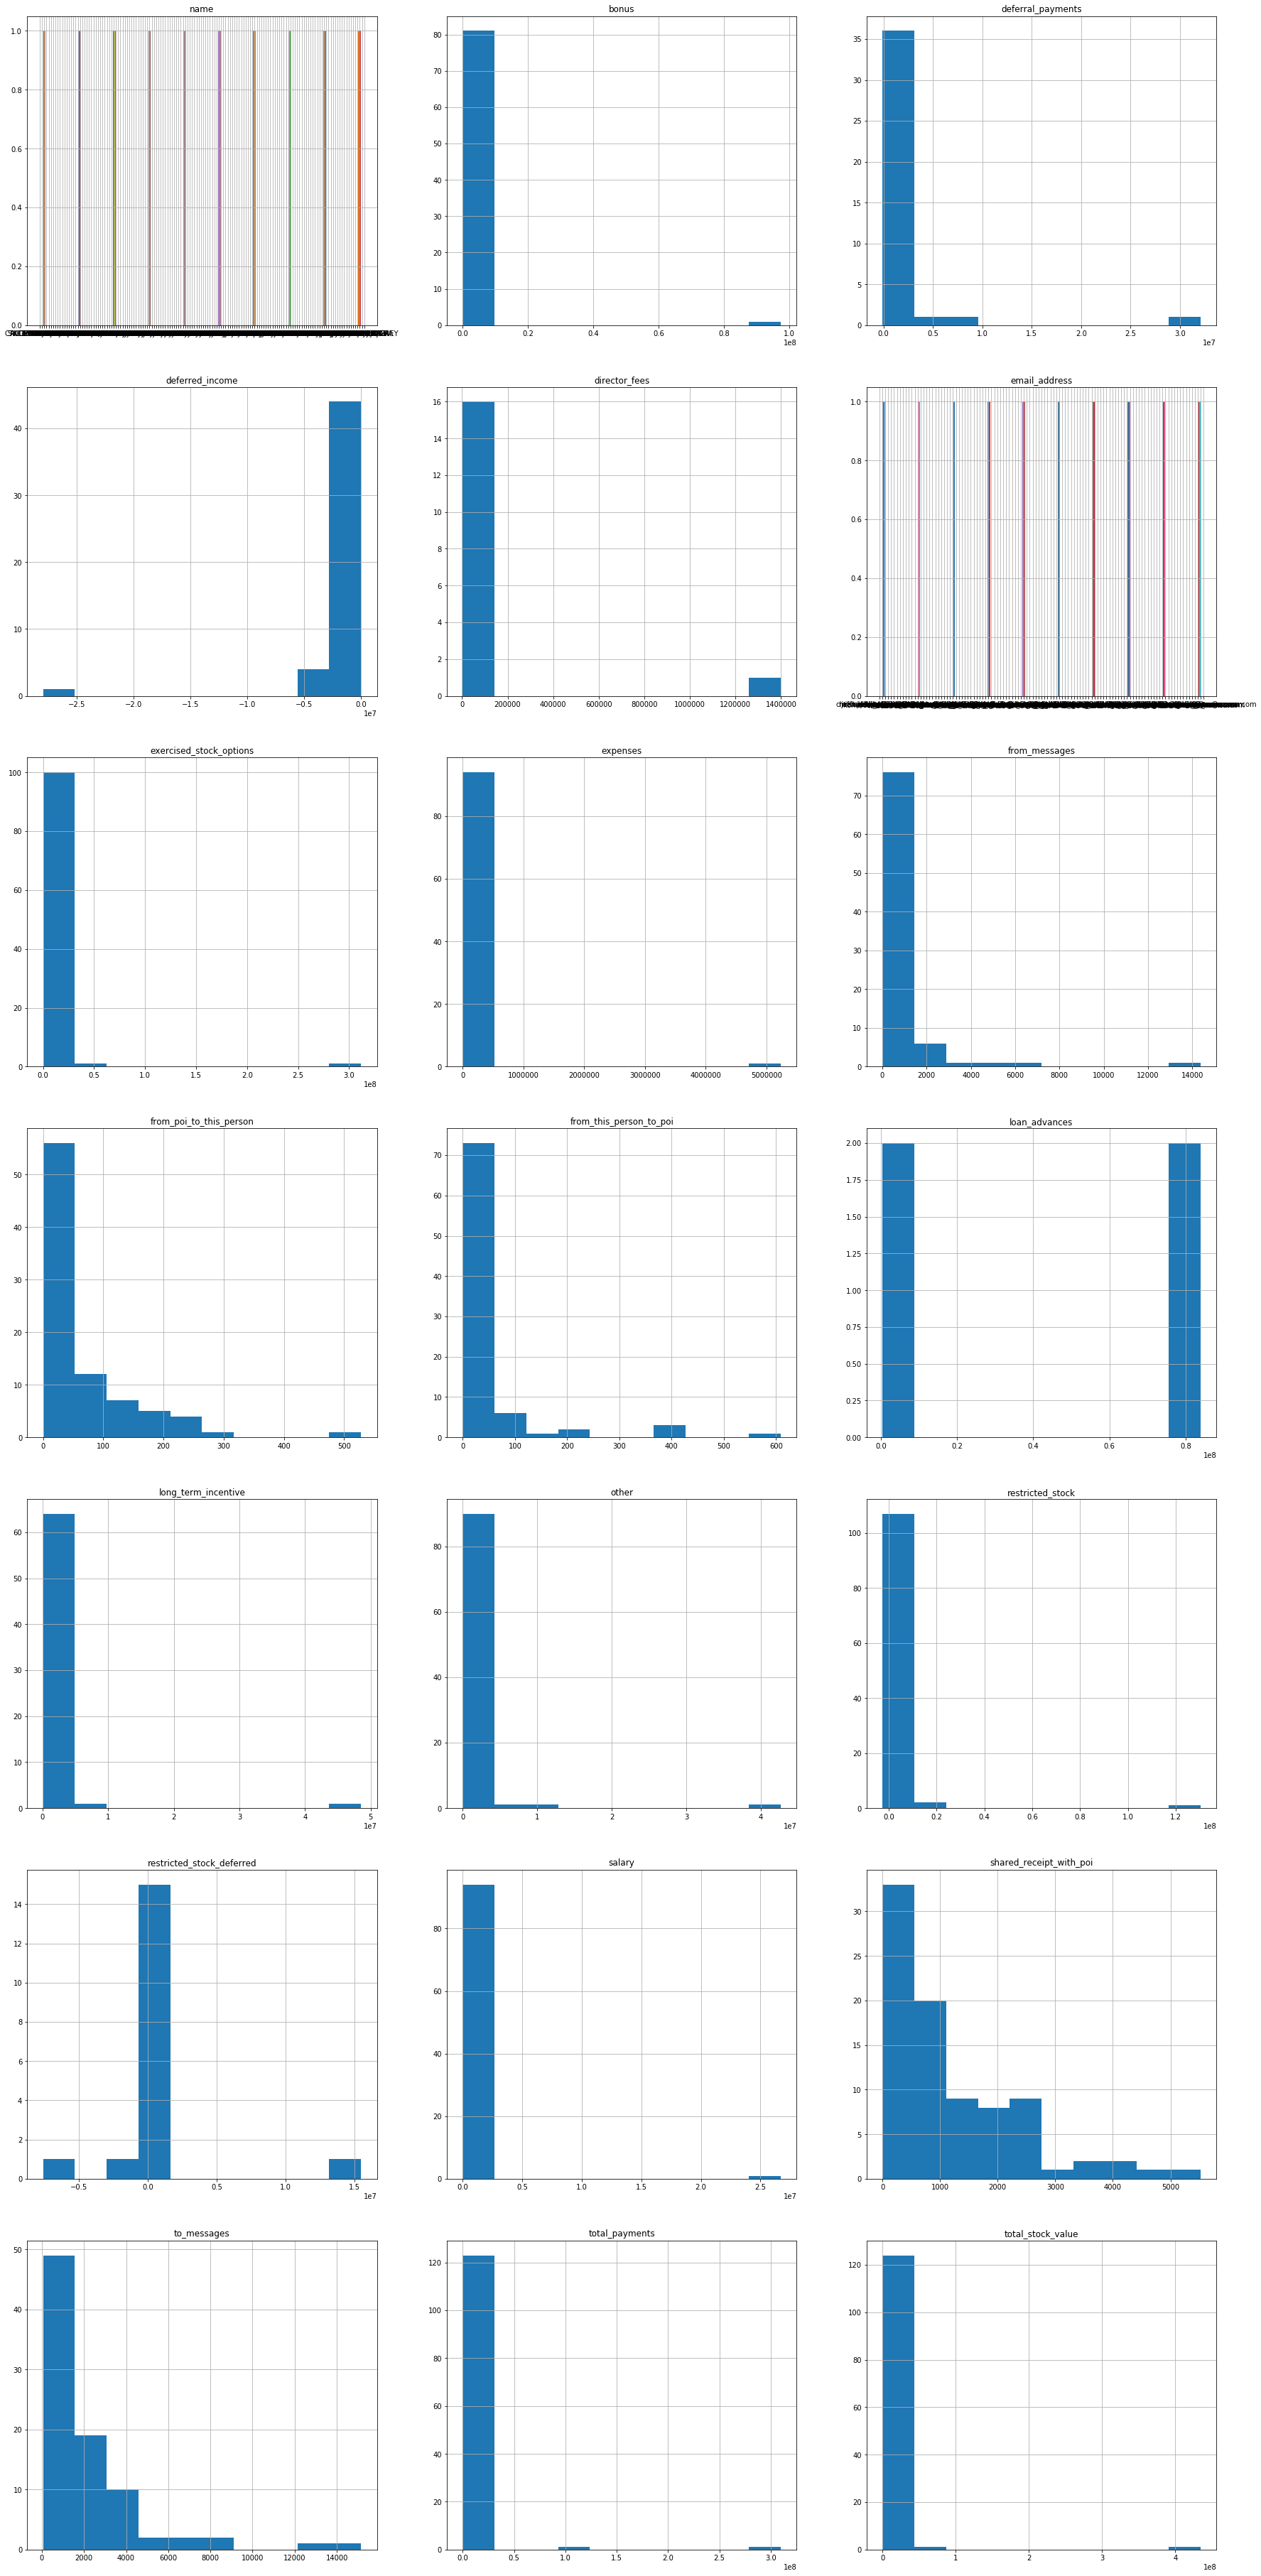

In [8]:
nrows = len(column)
ncols = nrows // 7

plt.figure(figsize=(30, 200))
for i in range(len(column)):

    plt.subplot(nrows, ncols, i+1)
    a = df[column[i]].dropna()
    a.hist()
    plt.title(str(column[i]))
    
plt.show()

- 'name', 'email_address'為離散資料，做dummy也沒有實質作用，之後不會移除不用
- 'bonus', 'deferral_payments', 'exercised_stock_options', 'expenses', 'long_term_incentive', 'other', 'restricted_stock', 'salary', 'total_payments', 'total_stock_value'NA補平均數
- 'deferred_income', 會取成正值
- 'restricted_stock_deferred', 做常態化後NA補平均數
- 'from_messages', 'from_poi_to_this_person',  'from_this_person_to_poi', 'shared_receipt_with_poi', 'to_messages',取log去偏態後NA補中位數
- 'loan_advances', 'director_fees' 空值太多，故不以採納



















In [9]:
### 補平均值
### 補中位數看看
# fill_mean = ['bonus', 'deferral_payments', 'director_fees', 'exercised_stock_options', 'expenses', 'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 'salary', 'total_payments', 'total_stock_value']
fill_mean = ['bonus', 'deferral_payments', 'exercised_stock_options', 'expenses', 'long_term_incentive', 'other', 'restricted_stock', 'salary', 'total_payments', 'total_stock_value']
for f in fill_mean:
    df[f] = df[f].fillna(df[f].mean())

In [10]:
### 取正值，再補平均數
### 取正值，再補中位數看看
pos_mean = ['deferred_income']
for f in pos_mean:
    df[f] = abs(df[f])
#     df[f] = df[f].fillna(df[f].mean())
    df[f] = df[f].fillna(df[f].median())

In [11]:
### 做常態化後NA補平均數
normal_mean = ['restricted_stock_deferred']
for f in normal_mean:
    df[f] = preprocessing.scale(df[f], axis=0, with_mean=True, with_std=True, copy=True) # Data 為原始資料
    df[f] = df[f].fillna(df[f].mean())


In [12]:
### 取log去偏態後NA補中位數
log_median = ['from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi', 'to_messages',]
for f in log_median:
    df[f] = df[f].map(lambda i: np.log(i) if i > 0 else 0)
    df[f] = df[f].fillna(df[f].median())

In [13]:
# 捨棄 'name', 'email_address' 欄位
# df.drop(labels = ['name', 'email_address'], axis = 1, inplace = True)
df.drop(labels = ['name', 'email_address', 'loan_advances', 'director_fees'], axis = 1, inplace = True)

In [14]:
na_check(df)
df.head()

,Missing Ratio


,bonus,deferral_payments,deferred_income,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,1.642674e+06,3504386.0,1.979418e+07,46950.0,2.890372,3.737670,1.386294,1.617011e+06,174839.0,2748364.0,0.0,420636.0,6.761573,6.807935,505050.0,22542539.0
1,5600000.0,1.642674e+06,159792.0,1.925000e+07,29336.0,4.682131,4.477337,3.401197,1.920000e+06,22122.0,6843672.0,0.0,1111258.0,7.621685,8.196161,8682716.0,26093672.0
2,200000.0,1.642674e+06,4167.0,1.624396e+06,22884.0,3.663562,2.564949,2.639057,1.470361e+06,1573324.0,869220.0,0.0,211844.0,4.510860,5.416100,2003885.0,2493616.0
3,800000.0,1.642674e+06,159792.0,5.987054e+06,118134.0,0.000000,0.000000,0.000000,6.026710e+05,907502.0,985032.0,0.0,224305.0,0.000000,0.000000,2652612.0,985032.0
4,1250000.0,1.642674e+06,262500.0,5.987054e+06,35818.0,4.969813,5.293305,3.218876,3.753040e+05,486.0,126027.0,0.0,240189.0,7.690743,7.862497,1639297.0,126027.0


In [15]:
# 將資料最大最小化
df = MinMaxScaler().fit_transform(df)

# 將前述轉換完畢資料 df , 重新切成 train_X, test_X
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

# 使用三種模型 : 邏輯斯迴歸 / 梯度提升機 / 隨機森林, 參數使用 Random Search 尋找
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
lr = LogisticRegression(tol=0.001, penalty='l2', fit_intercept=True, C=1.0)
gdbt = GradientBoostingClassifier(tol=100, subsample=0.75, n_estimators=250, max_features=10,
                                  max_depth=6, learning_rate=0.03)
rf = RandomForestClassifier(n_estimators=50, min_samples_split=2, min_samples_leaf=1, 
                            max_features='sqrt', max_depth=3, bootstrap=True)

In [16]:
# 線性迴歸預測檔 (結果有部分隨機, 請以 Kaggle 計算的得分為準, 以下模型同理)
lr.fit(train_X, train_Y)
lr_pred = lr.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': names, 'poi': lr_pred})
# sub['Survived'] = sub['Survived'].map(lambda x:1 if x>0.5 else 0) 
sub.to_csv('4th_mid_lr.csv', index=False) 

In [17]:
# 梯度提升機預測檔 
gdbt.fit(train_X, train_Y)
gdbt_pred = gdbt.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': names, 'poi': gdbt_pred})
# sub['Survived'] = sub['Survived'].map(lambda x:1 if x>0.5 else 0) 
sub.to_csv('4th_mid_gdbt.csv', index=False)

In [18]:
# 隨機森林預測檔
rf.fit(train_X, train_Y)
rf_pred = rf.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': names, 'poi': rf_pred})
# sub['Survived'] = sub['Survived'].map(lambda x:1 if x>0.5 else 0) 
sub.to_csv('4th_mid_rf.csv', index=False)

In [19]:
from mlxtend.classifier import StackingClassifier

meta_estimator = GradientBoostingClassifier(tol=100, subsample=0.70, n_estimators=50, 
                                           max_features='sqrt', max_depth=4, learning_rate=0.3)
stacking = StackingClassifier(classifiers=[lr, gdbt, rf], meta_classifier=meta_estimator, use_probas=True, average_probas=False)

In [20]:
stacking.fit(train_X, train_Y)
stacking_pred = stacking.predict(test_X)
sub = pd.DataFrame({'name': names, 'poi': stacking_pred})
sub.to_csv('4th_mid_stacking.csv', index=False)

In [21]:
# 混合泛化預測檔 (依 Kaggle 傳回分數調整比重, 越準確者比重越高, 依資料性質有所不同)
blending_pred = lr_pred*0.10  + gdbt_pred*0.70 + rf_pred*0.20
sub = pd.DataFrame({'name': names, 'poi': blending_pred})
# sub['Survived'] = sub['Survived'].map(lambda x:1 if x>0.6 else 0) 
sub.to_csv('4th_mid_blending_mean_pos_median.csv', index=False)